In [27]:
import sys
from pathlib import Path
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import ProbabilisticParcellation.functional_profiles as fp
import pandas as pd
import seaborn as sb
import ProbabilisticParcellation.scripts.atlas_paper.feature_model as fm
from ProbabilisticParcellation.scripts.atlas_paper.ridge_reg import ridgeFit
import numpy as np
import nitools as nt
import os


figure_path = "/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/papers/AtlasPaper/figure_parts/"
if not os.path.exists(figure_path):
    figure_path = "/Users/callithrix/Dropbox/AtlasPaper/figure_parts/"


# Import Dash dependencies
base_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/Users/callithrix/Documents/Projects/Functional_Fusion/'
if not Path(base_dir).exists():
    raise (NameError('Could not find base_dir'))
    

## Explore task differences

In [2]:
Data, regions = fm.load_profiles()
tags = fm.load_features()
tags_individ = fm.subject_features(tags, Data)
task_matrix, task_codes = fm.task_indicator(Data)
tags_task = np.concatenate(
    (tags_individ.T.to_numpy(), task_matrix), axis=1)

Data_norm, tags_norm = fm.normalize(Data[regions], tags_task)

# Ridge regression
R2, Features = ridgeFit(Data_norm.to_numpy(), tags_norm,
                        fit_intercept=False, voxel_wise=False, alpha=1.0)


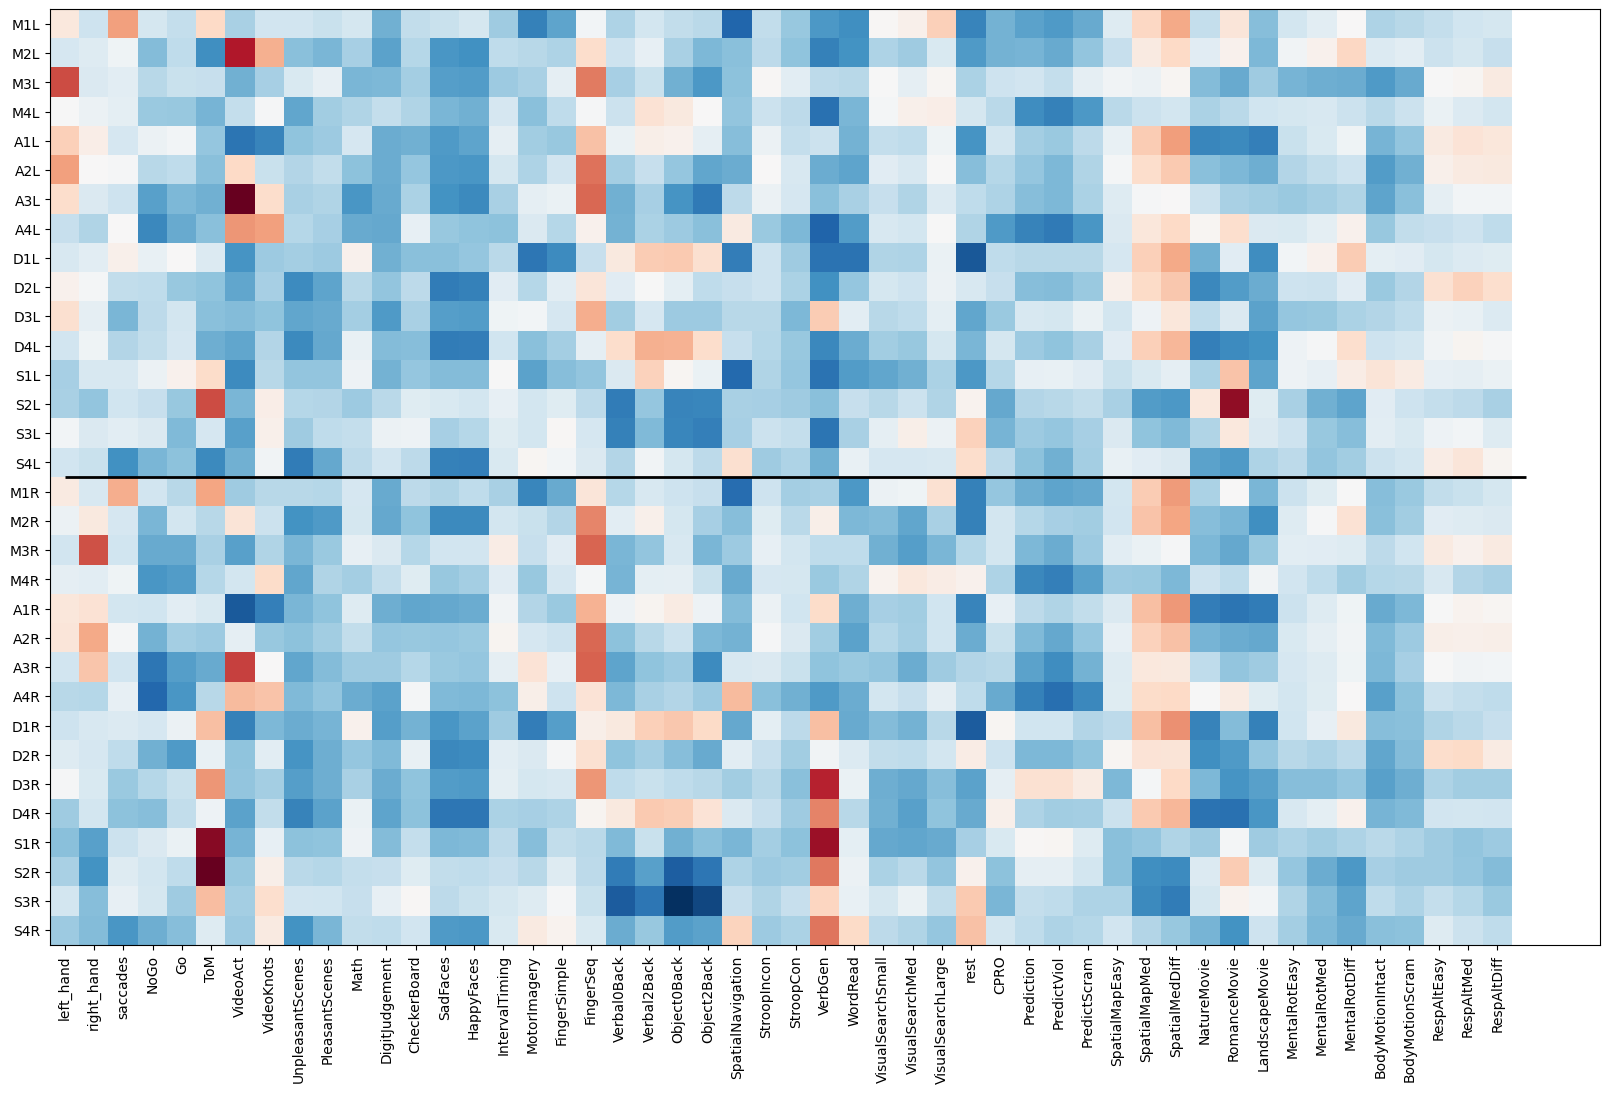

In [4]:
# Make dataframe
Features = pd.DataFrame(Features.T, columns=[
    'left_hand', 'right_hand', 'saccades'] + list(task_codes.keys()), index=regions)

# Plot
cmap = plt.get_cmap('RdBu_r')
plt.figure(figsize=(20, 20))
plt.imshow(Features, cmap=cmap)
plt.yticks(np.arange(len(regions)), regions)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)

# Plot a horizontal line in the middle
plt.hlines(len(regions) / 2 - 0.5, 0,
           len(Features.columns.tolist()), color='black', linewidth=2)


In [5]:
# Melt
T = Features.reset_index().melt(id_vars='index', value_vars=Features.columns.tolist(),
                         var_name='task', value_name='score')

# make index into column
T['region'] = T['index']
# # Split region into side and region
T['side'] = T.region.str[-1]
T['reg'] = T.region.str[0:2]


([<matplotlib.axis.YTick at 0x7feabaa8cc10>,
 [Text(0, 0, 'M1_'),
  Text(0, 1, 'M2_'),
  Text(0, 2, 'M3_'),
  Text(0, 3, 'M4_'),
  Text(0, 4, 'A1_'),
  Text(0, 5, 'A2_'),
  Text(0, 6, 'A3_'),
  Text(0, 7, 'A4_'),
  Text(0, 8, 'D1_'),
  Text(0, 9, 'D2_'),
  Text(0, 10, 'D3_'),
  Text(0, 11, 'D4_'),
  Text(0, 12, 'S1_'),
  Text(0, 13, 'S2_'),
  Text(0, 14, 'S3_'),
  Text(0, 15, 'S4_')])

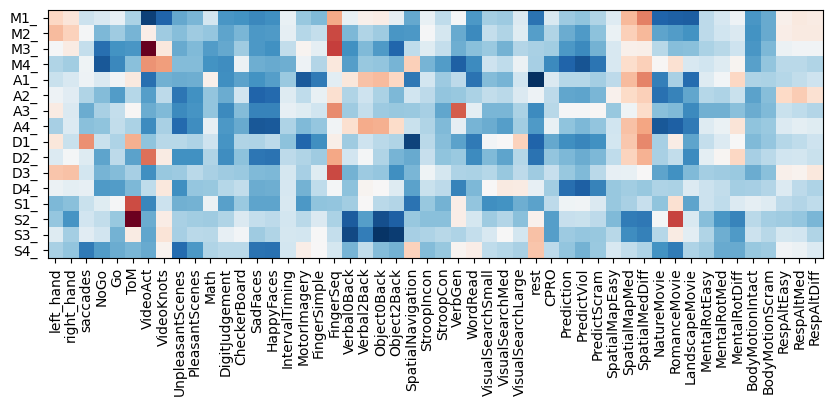

In [16]:

# Show feature matrix averaged across 'side'
plt.figure(figsize=(10, 10))
# plt.subplot(3, 1, 3)
plt.imshow(Features.groupby(
    Features.index.str[:2]).mean(), cmap=cmap)
plt.xticks(np.arange(len(Features.columns.tolist())),
           Features.columns.tolist(), rotation=90)
plt.yticks(np.arange(len(Features.index.str[:2].unique(
))), Features.index.str[:2].unique() + '_')


# Tasks that dissociate D & S network

/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:179: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

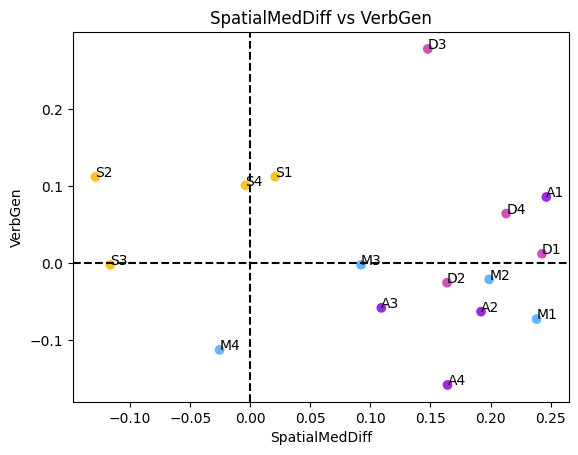

In [29]:
compare = ['SpatialMedDiff', 'VerbGen']
fm.scatter_plot_tasks(compare, T, ignore_side=True, color='domains')
plt.savefig(figure_path + f'localizers_networks-D-S_{compare[0]}_{compare[1]}.png', dpi=300)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:179: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

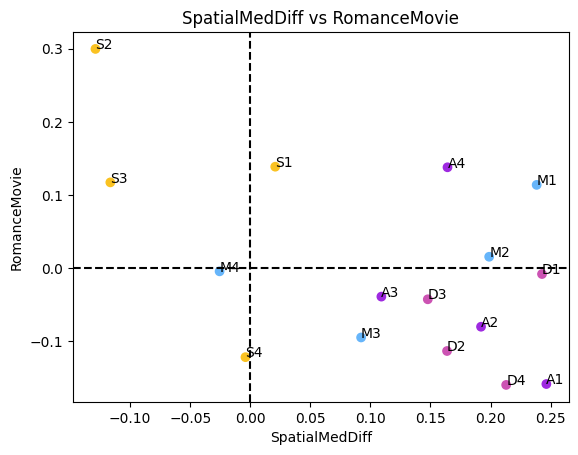

In [28]:
compare = ['SpatialMedDiff', 'RomanceMovie']
fm.scatter_plot_tasks(compare, T, ignore_side=True, color='domains')
plt.savefig(figure_path +
            f'localizers_networks-D-S_{compare[0]}_{compare[1]}.png', dpi=300)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


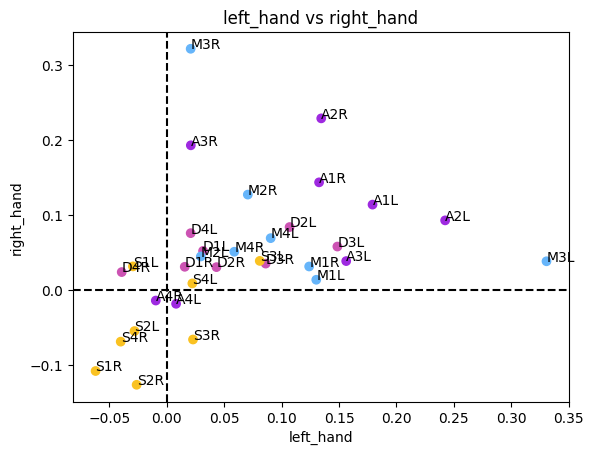

In [6]:
compare = ['left_hand', 'right_hand']
fm.scatter_plot_tasks(compare, T)

In [7]:
# tasks = T.task.unique()
# # Plot every task against every other task
# for i in range(len(tasks[:8])):
#     for j in range(len(tasks)):
#         if i < j:
#             plt.figure()
#             fm.scatter_plot_tasks([tasks[i], tasks[j]], T)

# Tasks that dissociate different S regions

## S2 vs S3: Theory of Mind & Rest

/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:179: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

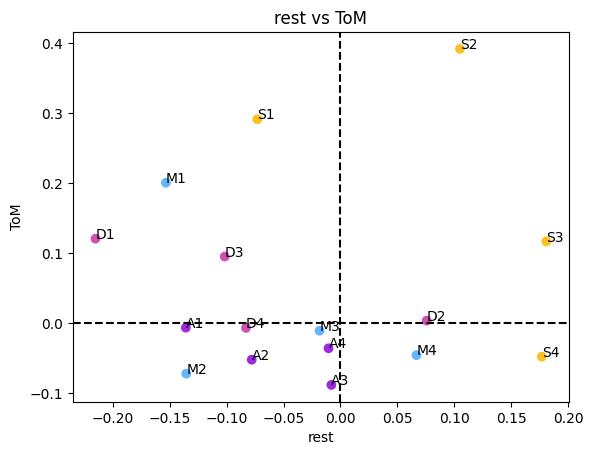

In [8]:
compare = ['rest', 'ToM']
fm.scatter_plot_tasks(compare, T, ignore_side=True)


## S1 vs S2: Theory of Mind & VerbGen

/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:179: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

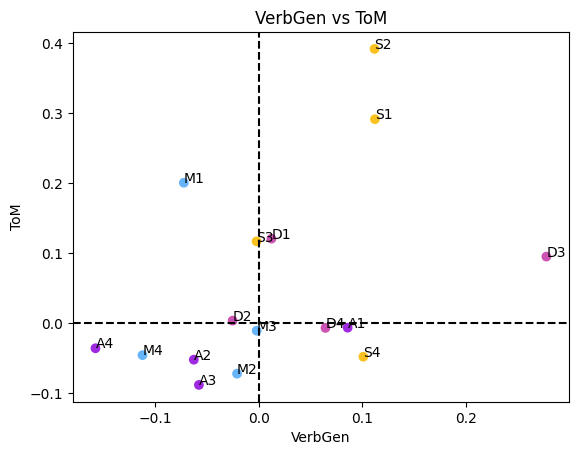

In [9]:
compare = ['VerbGen', 'ToM']
fm.scatter_plot_tasks(compare, T, ignore_side=True)


## S3 vs S4: RomanceMovie & SpatialNavigation

/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:179: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

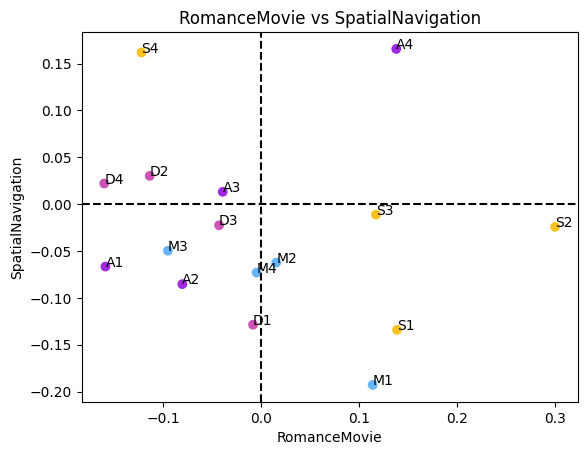

In [10]:
compare = ['RomanceMovie', 'SpatialNavigation']
fm.scatter_plot_tasks(compare, T, ignore_side=True)


# Exploring other task differences

/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:179: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

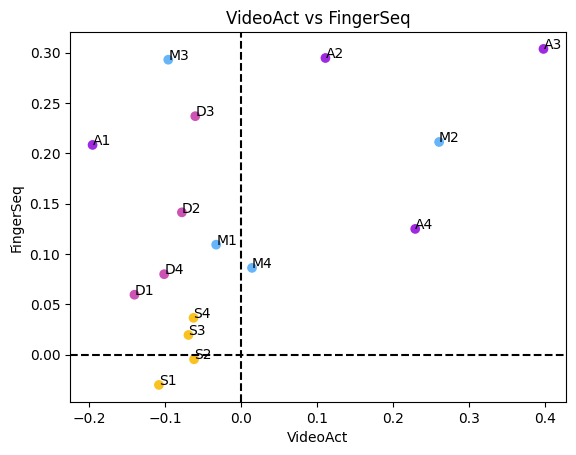

In [13]:
compare = ['VideoAct', 'FingerSeq']
fm.scatter_plot_tasks(compare, T, ignore_side=True)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:179: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

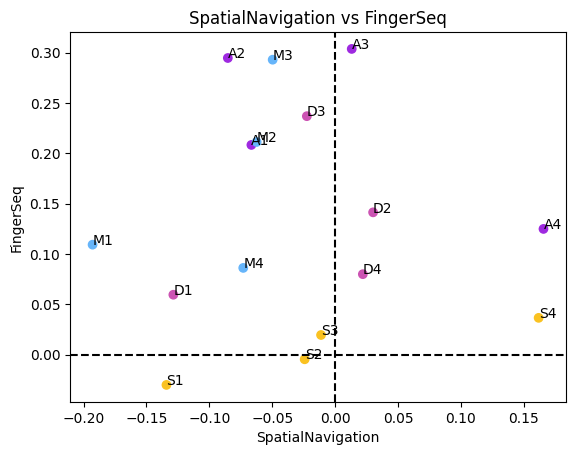

In [14]:
compare = ['SpatialNavigation', 'FingerSeq']
fm.scatter_plot_tasks(compare, T, ignore_side=True)


/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:179: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:185: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/Users/callithrix/code/Python/ProbabilisticParcellation/scripts/atlas_paper/feature_model.py:186: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeri

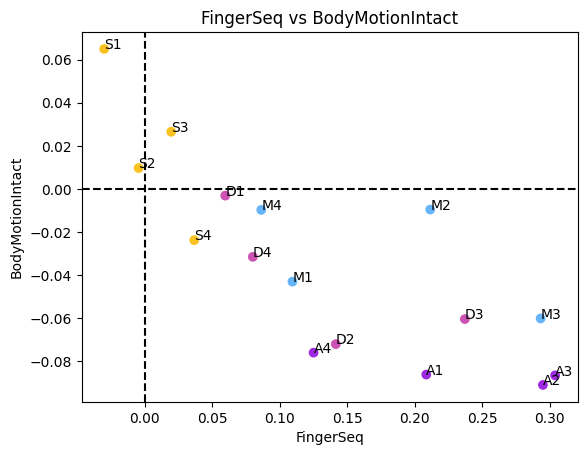

In [18]:
compare = ['FingerSeq', 'BodyMotionIntact']
fm.scatter_plot_tasks(compare, T, ignore_side=True)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


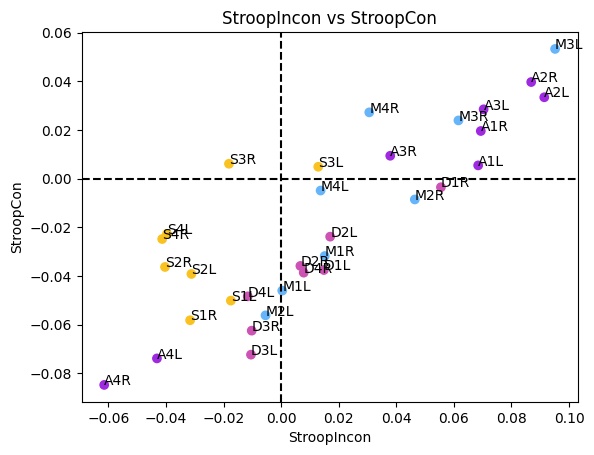

In [36]:
compare = ['StroopIncon', 'StroopCon']
fm.scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


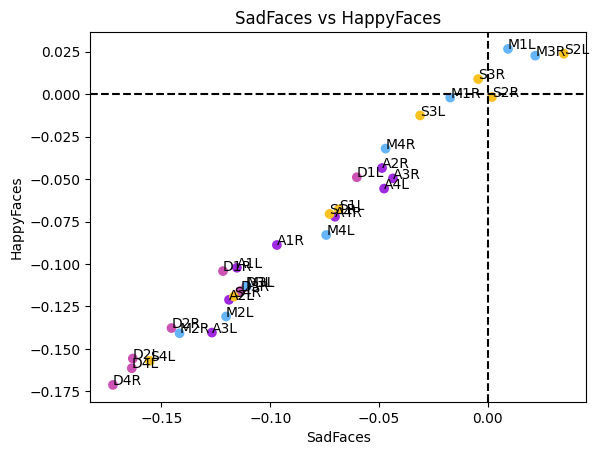

In [37]:
compare = ['SadFaces', 'HappyFaces']
fm.scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


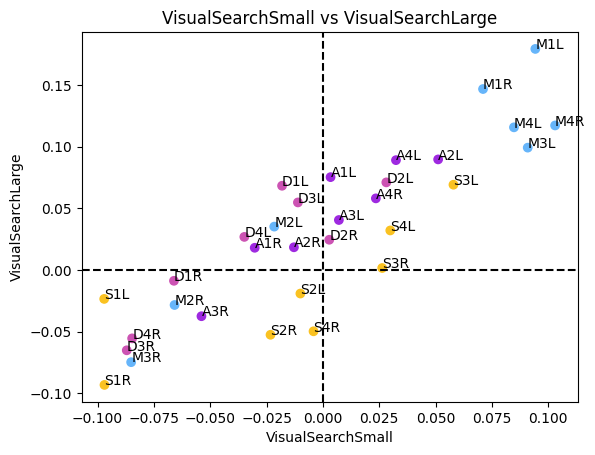

In [38]:
compare = ['VisualSearchSmall', 'VisualSearchLarge']
fm.scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


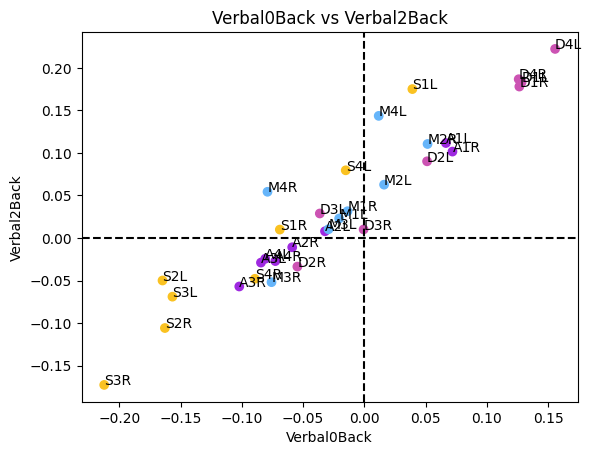

In [39]:
compare = ['Verbal0Back', 'Verbal2Back']
fm.scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


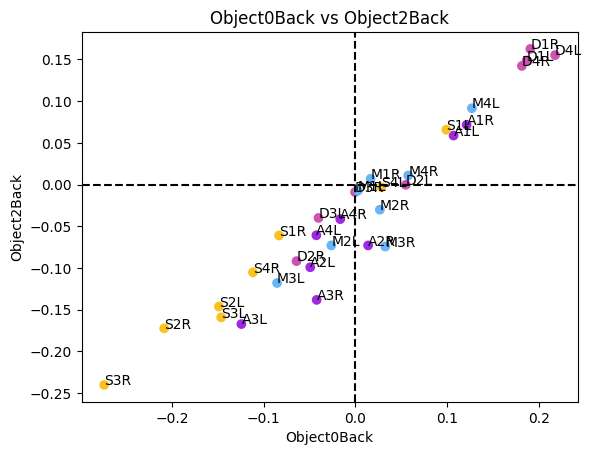

In [40]:
compare = ['Object0Back', 'Object2Back']
fm.scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


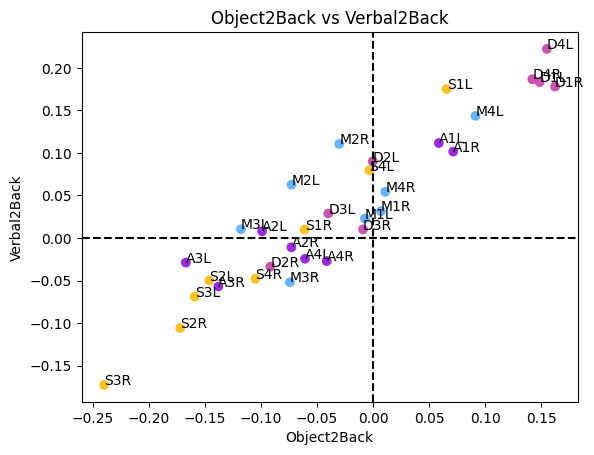

In [41]:
compare = ['Object2Back', 'Verbal2Back']
fm.scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify nume

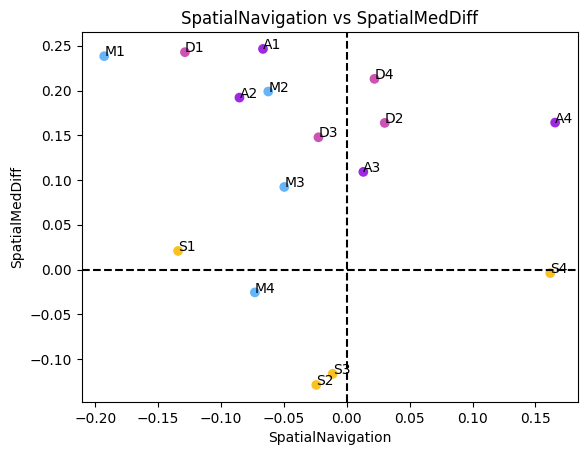

In [42]:
compare = ['SpatialNavigation', 'SpatialMedDiff']
fm.scatter_plot_tasks(compare, T, ignore_side=True)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


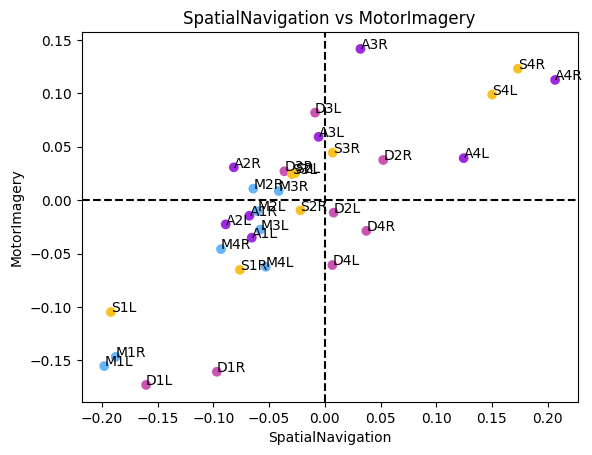

In [43]:
compare = ['SpatialNavigation', 'MotorImagery']
fm.scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


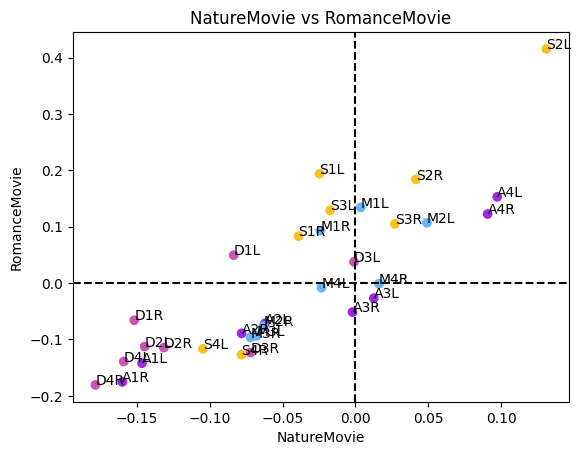

In [44]:
compare = ['NatureMovie', 'RomanceMovie']

fm.scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task2 = task2.groupby(['index']).mean().reset_index()


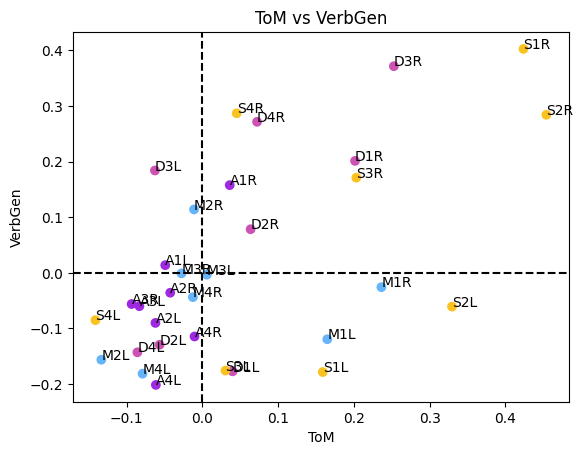

In [45]:
compare = ['ToM', 'VerbGen']
fm.scatter_plot_tasks(compare, T, ignore_side=False)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['reg', 'task']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  task1 = task1.groupby(['index']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_59971/332742341.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify nume

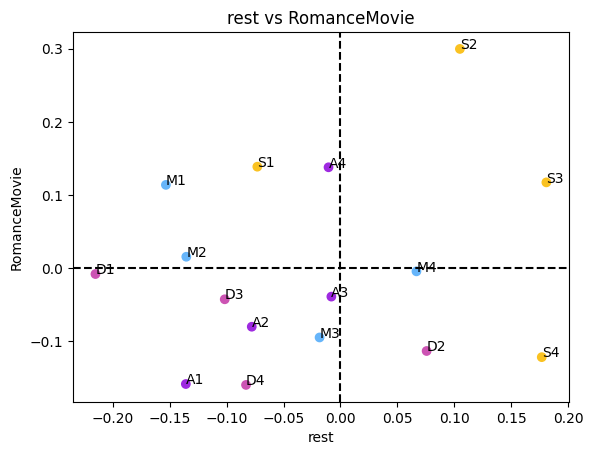

In [46]:
compare = ['rest', 'RomanceMovie']

fm.scatter_plot_tasks(compare, T, ignore_side=True)
